In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
import math
iteration_number = 10000
plt.rcParams["figure.figsize"] = (10,6)

## Question 1a)

In [2]:
#The recursion formula for Legendre Polynomials is:
#nP_n(x) = (2n+1)xP_{n-1}(x) - (n-1)P_{n-2}
#We can write a function for this:

def legendre_poly(n):
    """This function returns an array of the legendre polynomials for a given \
    n value, each evaluated at an angle mu in the interval [-1,1].
    """
    mu = np.linspace(-1,1.,iteration_number)
    if n==0:
        return np.ones(len(mu)) #creates a numpy array of ones that is same length of x
    if n==1: 
        return mu
    else:
        P_n = (((2. * n - 1.) * mu * legendre_poly(n-1) - (n-1.)\
        * legendre_poly(n-2))/(n)) #if mu is a float, will return a float
        #print(P_n)
        return(P_n) 
    
legendre_poly(2)

array([1.        , 0.9994    , 0.99880012, ..., 0.99880012, 0.9994    ,
       1.        ])

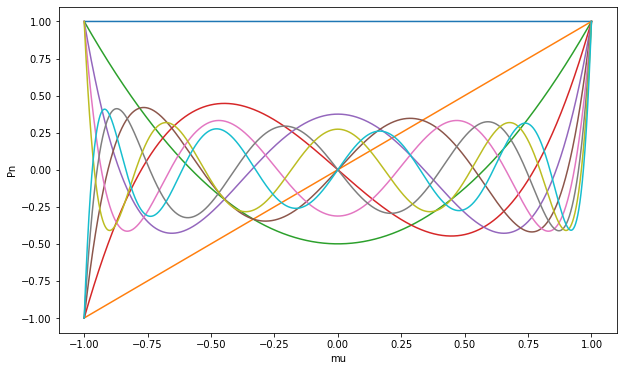

'Information to note:\nP0 = blue & 0 nodes & \nP1 = orange & 0 nodes\nP2 = green & 1 node\nP3 = red & 2 nodes\nP4 = purple & 3 nodes\nP5 = brown & 4 nodes\nP6 = pink & 5 nodes\nP7 = grey & 6 nodes\nP8 = olive & 7 nodes\nP9 = teal & 8 nodes\n'

In [3]:
# Creating an array of x values
mu = np.linspace(-1, 1., iteration_number)  
  
# Now polynomial values are evaluated and plotted
for i in range(0, 10): #For the first 9 polynomials
    plt.plot(mu, legendre_poly(i))
plt.xlabel("mu")
plt.ylabel("Pn")
plt.show()

"""Information to note:
P0 = blue & 0 nodes & 
P1 = orange & 0 nodes
P2 = green & 1 node
P3 = red & 2 nodes
P4 = purple & 3 nodes
P5 = brown & 4 nodes
P6 = pink & 5 nodes
P7 = grey & 6 nodes
P8 = olive & 7 nodes
P9 = teal & 8 nodes
"""

## Question 1b)

In [4]:
def trap_integration(f,a,b,n):
    """
    This function takes an array P_mn and performs the trapezoidal rule integration, 
    by summing P_mn over all angles.
    """
    dmu = (b-a)/n 
    T_mn = dmu * ( -f[0]/2. + (sum(f[0:n]) -f[n-1]/2))
    return(T_mn)

In [5]:
def generate_pairs(k):
    """Forms each possible pair of Legendre polynomials by multiplying the array
    for each polynomial (P_m, P_n) together and forming an array denoted P_mn.
    Then integrates them using the trapezoidal rule to demonstrate their orthogonality."""
    for i in range(0,k):
        P_m = legendre_poly(i)
        for j in range(0,k): 
            P_n = legendre_poly(j)
            P_mn = P_m * P_n
            if i==j:
                print('for m = n =', i)
                print(trap_integration(P_mn,-1,1.,iteration_number))
            else:
                print('for m = ', i, 'and n = ', j)
                print(trap_integration(P_mn,-1,1.,iteration_number), ': Approx. zero')
generate_pairs(10)

for m = n = 0
1.9998
for m =  0 and n =  1
-5.10702591327572e-18 : Approx. zero
for m =  0 and n =  2
2.0002001272523275e-08 : Approx. zero
for m =  0 and n =  3
9.905409825705647e-17 : Approx. zero
for m =  0 and n =  4
6.667333291998646e-08 : Approx. zero
for m =  0 and n =  5
8.968381592922015e-17 : Approx. zero
for m =  0 and n =  6
1.4001399620711119e-07 : Approx. zero
for m =  0 and n =  7
7.127631818093505e-17 : Approx. zero
for m =  0 and n =  8
2.400239715708796e-07 : Approx. zero
for m =  0 and n =  9
8.075762281123389e-17 : Approx. zero
for m =  1 and n =  0
-5.10702591327572e-18 : Approx. zero
for m = n = 1
0.666600013334666
for m =  1 and n =  2
1.7006396291208148e-16 : Approx. zero
for m =  1 and n =  3
4.66713337885949e-08 : Approx. zero
for m =  1 and n =  4
6.616929226765933e-17 : Approx. zero
for m =  1 and n =  5
1.0667733125142576e-07 : Approx. zero
for m =  1 and n =  6
5.135891711915974e-17 : Approx. zero
for m =  1 and n =  7
1.933526495068616e-07 : Approx. zero


## Question 3a

In [6]:
def henyey_green_theta(g):
    """Creates an array of values (a vector) of the Henyey-Greenstein function 
    evaluated at various theta in [0,180]."""
    theta = np.linspace(0,np.pi,iteration_number)
    P_hg = (1.-(g**2))*((1. + (g**2) - (2. * g * np.cos(theta)))**(-3/2))
    return(P_hg)

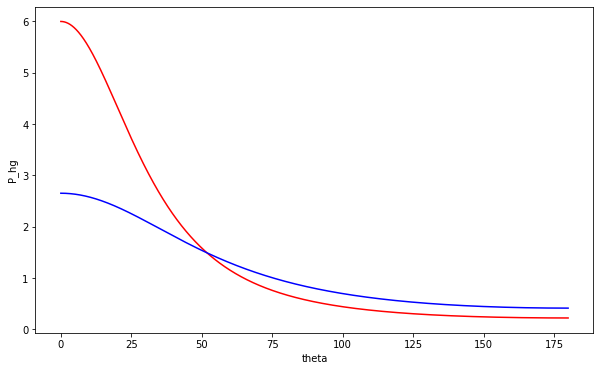

In [7]:
theta = np.linspace(0,180,iteration_number) # [pi, 0] since it goes from [-1,1]
plt.plot(theta, henyey_green_theta(0.5), 'r')
plt.plot(theta, henyey_green_theta(0.3), 'b')
plt.xlabel("theta")
plt.ylabel("P_hg")
plt.show()
#should peak at zero
#g = 0.3 (blue) has more forward scattering (higher P_hg for theta = 0)

## Question 3b

In [8]:
def henyey_green_mu(g):
    """Creates an array of values of the Henyey-Greenstein function evaluated at
    various mu in [-1,1]."""
    mu = np.linspace(-1.,1.,iteration_number)
    P_hg = (1.-(g**2))*((1. + (g**2) - (2. * g * mu))**(-3/2))
    return(P_hg)

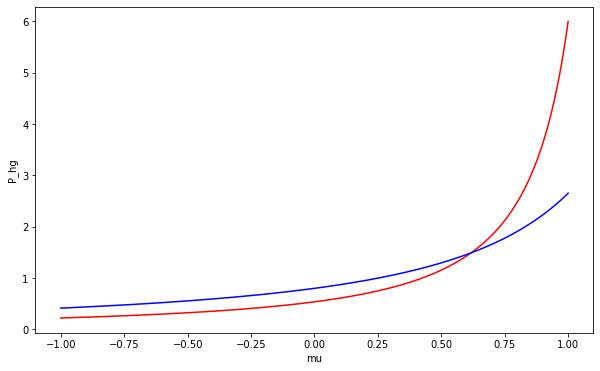

In [9]:
mu = np.linspace(-1,1.,iteration_number)
plt.plot(mu, henyey_green_mu(0.5), 'r')
plt.plot(mu, henyey_green_mu(0.3), 'b')
plt.xlabel("mu")
plt.ylabel("P_hg")
plt.show()
#should peak at mu = 1. g = 0 would be flat.

## Question 3c

In [10]:
#P_hg = (1-g**2)*((1 + g**2 - 2 * g * np.cos(theta))**(-3/2))

In [11]:
def phase_fxn_verify(setting_g):
    """Finds the expansion coefficient p_n for a given n value."""
    print('The expansion coefficients are:')
    for i in range(0,10):
        P_ij = (henyey_green_mu(setting_g) * legendre_poly(i))
        #integration over angles in [-1,1] for a particular value of P_i
        a_n_2n_1 = (trap_integration(P_ij, -1.,1.,iteration_number))/2
        print("for n =", i)
        a_n_actual = a_n_2n_1 #check approximations by multiplying by (2.*i+1.) here
        print('a_n = p_n = ', a_n_actual)
        g_n = setting_g**i
        print('g^n = ', g_n)  
phase_fxn_verify(0.3)
#for g = 0.5, would need 7 terms to be a good approximation.
#for g = 0.3, would need 5 terms.

The expansion coefficients are:
for n = 0
a_n = p_n =  0.9999000077547577
g^n =  1.0
for n = 1
a_n = p_n =  0.29997001222190534
g^n =  0.3
for n = 2
a_n = p_n =  0.08999102309260237
g^n =  0.09
for n = 3
a_n = p_n =  0.026997330880937784
g^n =  0.026999999999999996
for n = 4
a_n = p_n =  0.00809924888090848
g^n =  0.0081
for n = 5
a_n = p_n =  0.002429821467194312
g^n =  0.0024299999999999994
for n = 6
a_n = p_n =  0.0007290422196693903
g^n =  0.0007289999999999998
for n = 7
a_n = p_n =  0.0002187911106678017
g^n =  0.00021869999999999995
for n = 8
a_n = p_n =  6.579524787191709e-05
g^n =  6.560999999999998e-05
for n = 9
a_n = p_n =  1.9857453041935408e-05
g^n =  1.9682999999999994e-05


# Question 3d

In [12]:
def g(f):
    """This function is verifying that g is the asymmetry parameter by taking the nth/
    root of p_n."""
    print('Verifying that g is the asymmetry parameter:')
    for i in range(1,10):
        P_ij = (f * legendre_poly(i))
        #integration over angles in [-1,1] for a particular value of P_i
        a_n_2n_1 = (trap_integration(P_ij, -1.,1.,iteration_number))*(2*i + 1)/2
        print("for n =", i)
        a_n_actual = a_n_2n_1/(2.*i+1.)
        g = a_n_actual**(1./i)
        print('g^n = p_n = ', a_n_actual)
        print('g =',g)
g(henyey_green_mu(0.5))

Verifying that g is the asymmetry parameter:
for n = 1
g^n = p_n =  0.49995006988352464
g = 0.49995006988352464
for n = 2
g^n = p_n =  0.24997509087327557
g = 0.4999750902527801
for n = 3
g^n = p_n =  0.12498761803648077
g = 0.49998349017016475
for n = 4
g^n = p_n =  0.062493913473113935
g = 0.4999878265016529
for n = 5
g^n = p_n =  0.03124707971179034
g = 0.4999906547283992
for n = 6
g^n = p_n =  0.015623715058555792
g = 0.499993146744133
for n = 7
g^n = p_n =  0.007812048659429341
g = 0.49999587335546597
for n = 8
g^n = p_n =  0.00390629250456072
g = 0.5000006800697341
for n = 9
g^n = p_n =  0.001953423316842147
g = 0.5000084848808749


# Question 4a

In [13]:
def legendre_poly_theta(n):
    """This function returns an array of the legendre polynomials for a given \
    n value, each evaluated at an angle theta in the interval [0,180]."""
    theta = np.linspace(0,np.pi,iteration_number)
    if n==0:
        return np.ones(len(np.cos(theta))) #creates a numpy array of ones that is same length of x
    if n==1: 
        return np.cos(theta)
    else:
        P_n = (((2. * n - 1.) * np.cos(theta) * legendre_poly_theta(n-1) - (n-1.)\
        * legendre_poly_theta(n-2))/(n)) #if mu is a float, will return a float
        #print(P_n)
        return(P_n) 

Text(0, 0.5, 'p(cos(theta))')

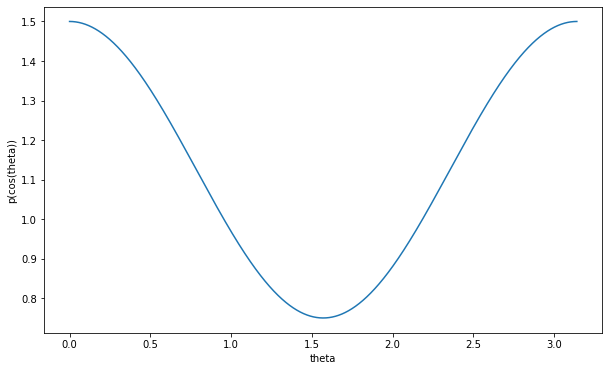

In [14]:
theta = np.linspace(0.,np.pi,iteration_number)
cos_theta = np.cos(theta)
#need to define legendre poly in terms of theta since I did in mu above
p_cos = 1. + 0.5*legendre_poly_theta(2)
plt.plot(theta, p_cos)
plt.xlabel("theta")
plt.ylabel("p(cos(theta))")

Text(0, 0.5, 'p(mu)')

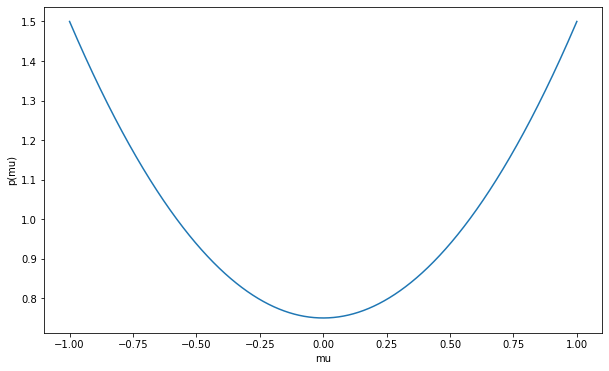

In [15]:
#For form p_mu = 1. + 0.5*P_2(mu)
mu = np.linspace(-1.,1.,iteration_number)
p_mu = 1. + 0.5*legendre_poly(2)
plt.plot(mu, p_mu)
plt.xlabel("mu")
plt.ylabel("p(mu)")

# Question 4b

In [16]:
#If you did not have the analytic form in Legendre polynomials, 
#how could you generate the series coefficients given a vector in mu?
#you could mutliply the Rayleigh scattering fxn by P_j and integrate:
#((2j+1)/2) * int(-1 to 1) P_j(mu) * f(mu) dmu

# Question 4c

In [17]:
#for this function, g = 0 (although it is not isotropic).
#with the same g, the HG would just be 1.

# Question 5a

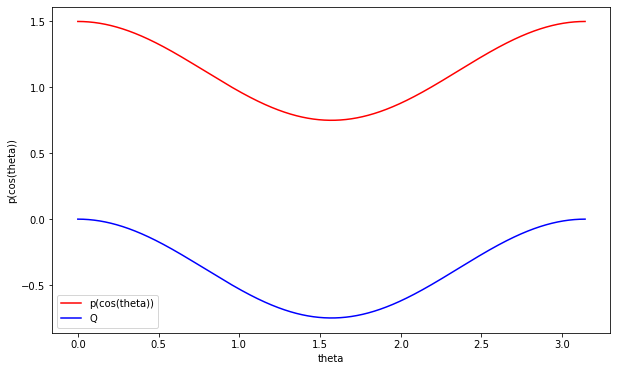

In [18]:
theta = np.linspace(0,np.pi,iteration_number)
p_cos = 1. + 0.5*legendre_poly_theta(2)
plt.plot(theta, p_cos, 'r')

Q = 0.5 * (legendre_poly_theta(2) - 1)
plt.plot(theta, Q, 'b')
plt.xlabel("theta")
plt.ylabel("p(cos(theta))")
plt.legend(["p(cos(theta))","Q"], loc ="best")

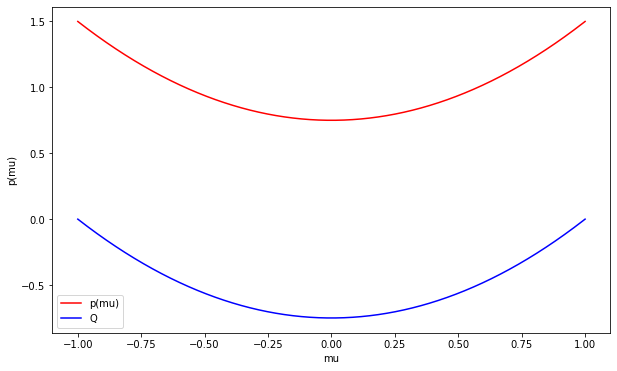

In [19]:
mu = np.linspace(-1.,1.,iteration_number)
p_mu = 1. + 0.5*legendre_poly(2)
plt.plot(mu, p_mu, 'r')

Q = 0.5 * (legendre_poly(2) - 1)
plt.plot(mu, Q, 'b')
plt.xlabel("mu")
plt.ylabel("p(mu)")
plt.legend(["p(mu)","Q"], loc ="best")

# Question 5b

Text(0, 0.5, 'Q / I')

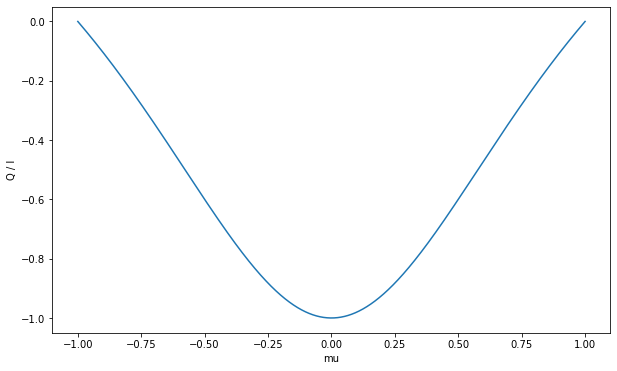

In [20]:
#the polarization fraction phase function
Q_I = (legendre_poly(2) - 1)/(legendre_poly(2) + 2)
mu = np.linspace(-1.,1.,iteration_number)
plt.plot(mu, Q_I)
plt.xlabel("mu")
plt.ylabel("Q / I")

In [21]:
def coefficient_generator(f):
    """Generates the Legendre coefficients of a function by multiplying the function 
    by each Legendre polynomial and numerically integrating."""
    print("The coefficients are:")
    for j in range(0,10):
        P_ij = (f) * legendre_poly(j)
        a_n = ((2*j+1)/2) *(trap_integration(P_ij, -1.,1.,iteration_number))/2
        print("for n =", j)
        #a_n_actual = a_n #check approximations by multiplying by (2.*i+1.) here
        if abs(a_n) < 1e-7:
            print('a_n = p_n = ', a_n, "(Practically zero)")
        else:
            print('a_n = p_n = ', a_n)

Q_I = (legendre_poly(2) - 1)/(legendre_poly(2) + 2)
coefficient_generator(Q_I)

The coefficients are:
for n = 0
a_n = p_n =  -0.28536962191427645
for n = 1
a_n = p_n =  -8.5153645202826205e-19 (Practically zero)
for n = 2
a_n = p_n =  0.35394624414525244
for n = 3
a_n = p_n =  -6.297485184150396e-17 (Practically zero)
for n = 4
a_n = p_n =  -0.08295118895330592
for n = 5
a_n = p_n =  -1.3747239024225479e-17 (Practically zero)
for n = 6
a_n = p_n =  0.01721939039969087
for n = 7
a_n = p_n =  3.126742842505387e-17 (Practically zero)
for n = 8
a_n = p_n =  -0.0033901262218904607
for n = 9
a_n = p_n =  7.81326229843532e-18 (Practically zero)


# Question 5c

In [22]:
#We have equations:
# 1/2 * (M2 + M1) = 0.5*P2 + 1
# 1/2 * (M2 - M1) = 0.5*P2 - 1/2

#Two equations, two unknowns resulting in:
# M1 = 3/2 = 3/2 * P0
# M2 = P2 + 1/2

# M1 = 1, M 2 = cos^2 theta

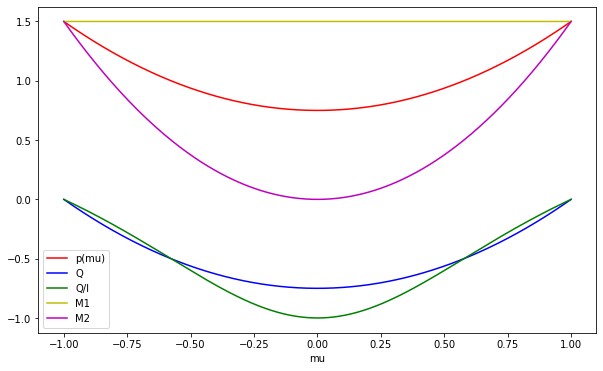

In [23]:
#Rayleigh phase function I
mu = np.linspace(-1.,1.,iteration_number)
p_mu = 1. + 0.5*legendre_poly(2)
plt.plot(mu, p_mu, 'r')

#Q phase function
Q = 0.5 * (legendre_poly(2) - 1)
plt.plot(mu, Q, 'b')
plt.xlabel("mu")
#plt.ylabel("p(mu)")

#Q/I phase function
Q_I = (legendre_poly(2) - 1)/(legendre_poly(2) + 2)
mu = np.linspace(-1.,1.,iteration_number)
plt.plot(mu, Q_I, 'g')
plt.xlabel("mu")
#plt.ylabel("Q / I")

#M1
M1 = np.ones(len(mu)) *3/2
plt.plot(mu, M1, 'y')

#M2
M2 = legendre_poly(2) + 1/2
plt.plot(mu, M2, 'm')

plt.legend(["p(mu)","Q", "Q/I", "M1", "M2"], loc ="best")

# Question 5d

In [24]:
#Which axis would be the “north-south” direction? 
#scattered neg. axis 2

#Which axis could reasonably be “north” and “east”? 

#From the above, is Q positive or negative?

#What about the sign of Q for scattering by a sphere of 
#size comparable to the wavelength? (See next question!)


# Question 6a

In [25]:
"""This function reads a very specific format of .txt file, where the first three lines 
contain information but no data. The data is then contained in 7 columns, 181 rows."""
def ascii_txt_reader(filepath, data_start):    
    with open(filepath, "r") as file:
        lines = file.readlines()
        print(lines[0], lines[1], lines[2])
        line_useful = lines[data_start:]

        whole_data = []
        for line in line_useful: #for each line of data 
            python_values = line.replace('D', 'E') #converts each line to python sci. notation
            stripped_values = python_values.strip()
            row = stripped_values.split() #creates rows by splitting into lines
            whole_data.append(row) #appending each line to an array
        #to extract rows, don't transpose in the following line:
        cols_str = np.transpose(np.array(whole_data)) #transposes array from rows to columns
        cols = cols_str.astype(float) #takes the columns and converts all the values from strings to floats
        return cols


In [26]:
ascii_txt_reader("compaSilreddraine.txt",3) 

 numangles= 181
   g= 5.80738D-01
    scat. angle           m2               m1              s21              d21           phase func.      polarization  



array([[ 0.0000e+00,  1.0000e+00,  2.0000e+00, ...,  1.7800e+02,
         1.7900e+02,  1.8000e+02],
       [ 7.5221e+00,  7.5150e+00,  7.4940e+00, ...,  2.8176e-01,
         2.8224e-01,  2.8240e-01],
       [ 7.5221e+00,  7.5152e+00,  7.4946e+00, ...,  2.8073e-01,
         2.8198e-01,  2.8240e-01],
       ...,
       [ 0.0000e+00,  9.7643e-04,  3.8924e-03, ...,  6.7660e-04,
         1.7022e-04,  3.4347e-18],
       [ 7.5221e+00,  7.5151e+00,  7.4943e+00, ...,  2.8124e-01,
         2.8211e-01,  2.8240e-01],
       [ 0.0000e+00,  1.0143e-05,  4.0599e-05, ..., -1.8274e-03,
        -4.5682e-04, -9.8286e-17]])

# Question 6b

In [27]:
def log_plotting(fxn, pos_start, neg_endpoint, pos_color, neg_color):
    """Takes a function and plots the log of its positive y values normally, then 
    converts the negative y values to positive, takes the log and plots them
    in a different colour."""
    #positive values
    pos_values = np.asarray(np.argwhere(fxn > 0))
    fxn_pos = fxn[pos_values[pos_start:]]
    plt.plot(sil_cols[0,pos_values[pos_start:]], np.log(fxn_pos), pos_color)

    #negative values
    neg_values = np.asarray(np.argwhere(fxn < 0))
    fxn_neg = (fxn[neg_values[0:neg_endpoint]]) #excludes angle 180 since it is ~0
    plt.plot(sil_cols[0,neg_values[0:neg_endpoint]], np.log(abs(fxn_neg)), neg_color)

 numangles= 181
   g= 5.80738D-01
    scat. angle           m2               m1              s21              d21           phase func.      polarization  



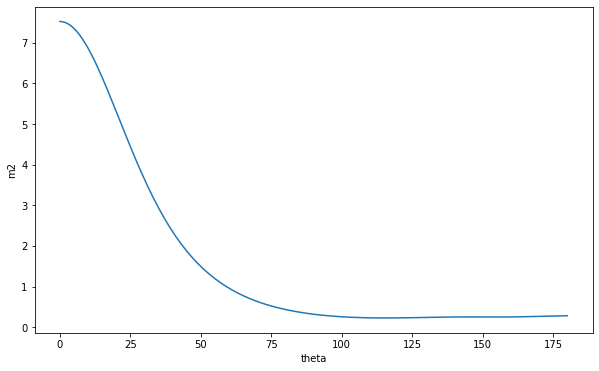

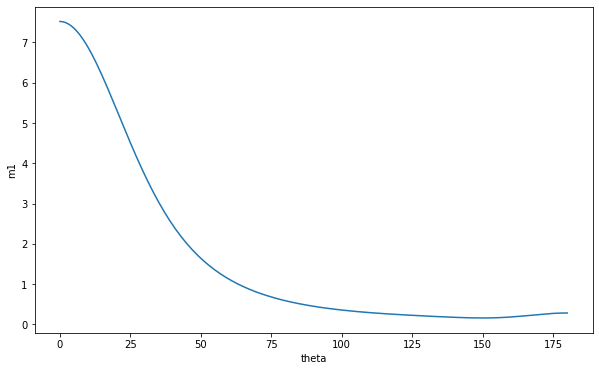

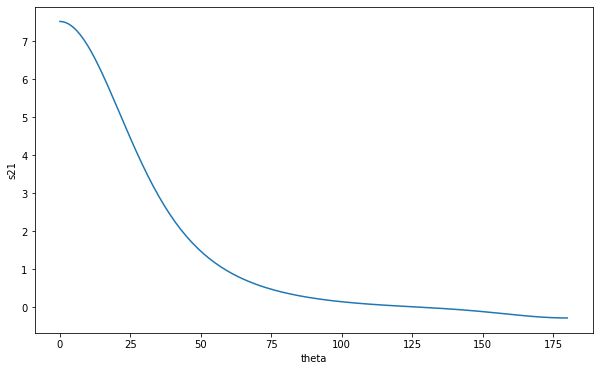

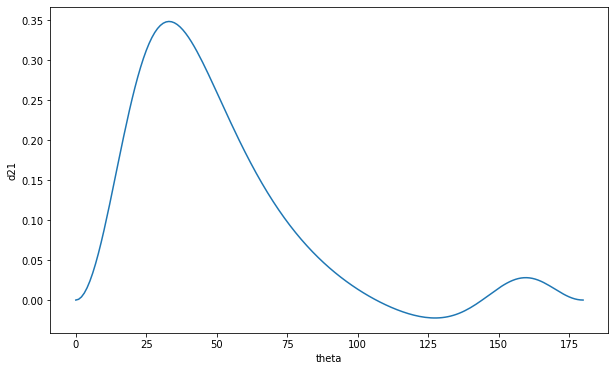

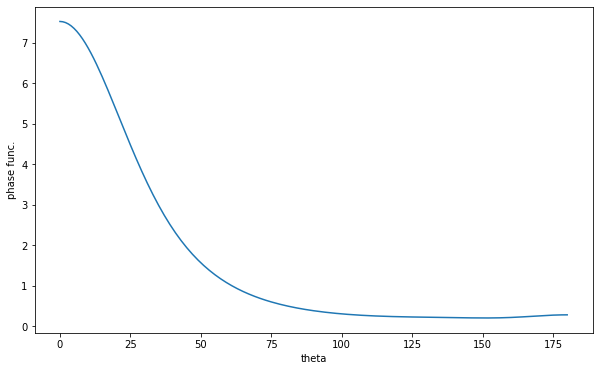

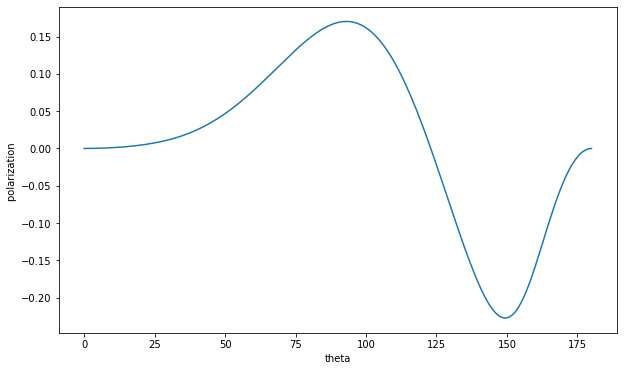

In [28]:
def plotting(plot_cols):
    """Plots each column in an ascii table versus the scattering angle theta."""
    header = ["scat. angle", "m2", "m1", "s21", "d21", "phase func.", "polarization "]
    for i in range(1,7):
        plt.plot(plot_cols[0,:],plot_cols[i,:])
        plt.xlabel('theta')
        plt.ylabel(header[i])
        plt.show()
plotting(ascii_txt_reader("compaSilreddraine.txt",3))

# Question 6c

 numangles= 181
   g= 5.80738D-01
    scat. angle           m2               m1              s21              d21           phase func.      polarization  



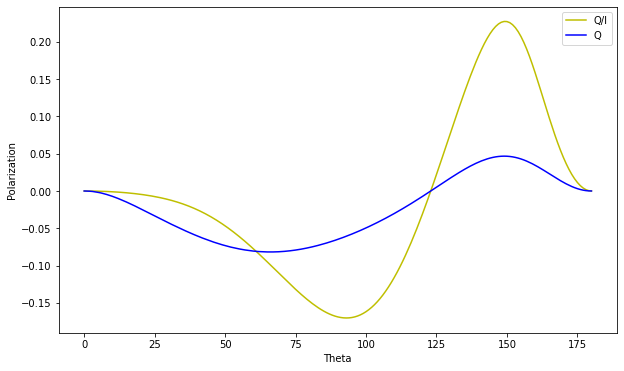

In [29]:
def pol_phase_fxns(filename): 
    """Plots the polarization and polarization fraction phase functions."""
    plot_cols = ascii_txt_reader(filename,3)
    plt.plot(plot_cols[0,:],-plot_cols[6,:], 'y') #notice the negative
    
    Q_phase_fxn = (plot_cols[1] - plot_cols[2]) * 0.5
    plt.plot(plot_cols[0,:],Q_phase_fxn[:], 'b')
    
    plt.xlabel('Theta')
    plt.ylabel('Polarization')
    plt.legend(['Q/I','Q'], loc = 'best')
    plt.show()
pol_phase_fxns("compaSilreddraine.txt")

# Question 6e

 numangles= 181
   g= 5.80738D-01
    scat. angle           m2               m1              s21              d21           phase func.      polarization  



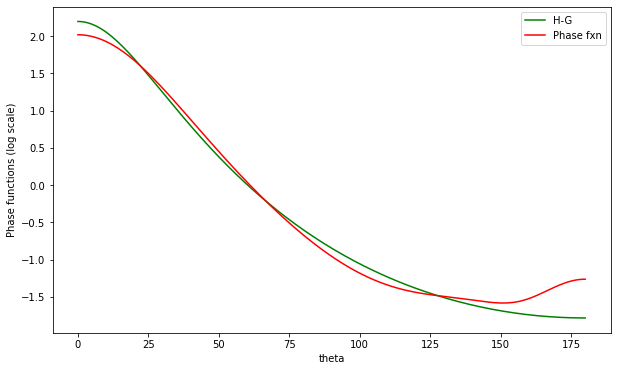

In [30]:
def comparing_phase_HG(filename, g):
    """Plots the Henyey-Greenstein function and the phase function I with a 
    logarithmic y-axis."""
    #Plotting HG fxn
    theta = np.linspace(0,180.,181)
    P_hg = (1.-(g**2))*((1. + (g**2) - (2. * g * np.cos(theta*np.pi/180)))**(-3/2))
    plt.plot(theta, np.log(P_hg), 'g')
    #Plotting phase fxn
    plot_cols = ascii_txt_reader(filename,3)
    plt.plot(plot_cols[0,:],np.log(plot_cols[5,:]), 'r')
   
    plt.xlabel('theta')
    plt.ylabel('Phase functions (log scale)')
    plt.legend(['H-G','Phase fxn'], loc = 'best')

comparing_phase_HG("compaSilreddraine.txt", 0.580738)

In [31]:
def evaluating_g(filename, g_value):
    """This function numerically computes the g of a given an ascii file and compares
    it to the actual g contained in the file."""
    columns = ascii_txt_reader(filename,3) 
    phase_func_col = columns[5]
    angle = np.linspace(0,180.,181)
    g_cos_theta = 0.5 * np.cos(angle) * np.sin(angle) * phase_func_col
    evaluation = trap_integration(g_cos_theta, 0.,180.,181)
    print('According to the file, the actual g = ', g_value)
    print('g numerically integrated over 181 angles evaluates to:')
    return(evaluation)
evaluating_g("compaSilreddraine.txt", 0.580738)

 numangles= 181
   g= 5.80738D-01
    scat. angle           m2               m1              s21              d21           phase func.      polarization  

According to the file, the actual g =  0.580738
g numerically integrated over 181 angles evaluates to:


0.6071602117176542

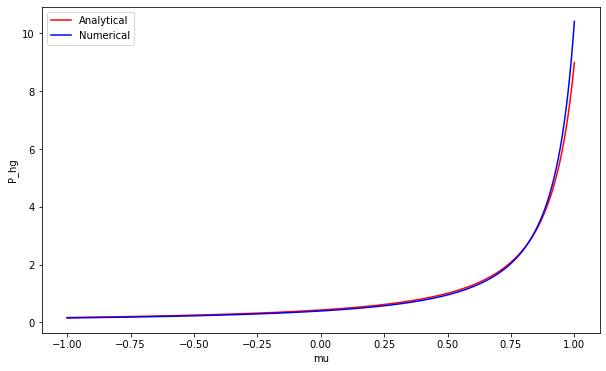

In [32]:
def HGs(g_analytical, g_numerical):  
    """Plots the numerical and analytical results for g to compare the accuracy of the
    numerical result."""
    mu = np.linspace(-1,1.,iteration_number)
    plt.plot(mu, henyey_green_mu(g_analytical), 'r')
    plt.plot(mu, henyey_green_mu(g_numerical), 'b')
    plt.xlabel("mu")
    plt.ylabel("P_hg")
    plt.legend(['Analytical', 'Numerical'], loc = 'best')
    plt.show()
HGs(0.580738, 0.607160)

# Question 7a

In [33]:
ascii_txt_reader('compLamCredzubko.txt', 3)

 numangles= 181
   g= 4.37525D-01
    scat. angle           m2               m1              s21              d21           phase func.      polarization  



array([[0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.7800e+02, 1.7900e+02,
        1.8000e+02],
       [5.4920e+00, 5.4871e+00, 5.4721e+00, ..., 4.3768e-01, 4.3801e-01,
        4.3812e-01],
       [5.4920e+00, 5.4890e+00, 5.4801e+00, ..., 4.3821e-01, 4.3814e-01,
        4.3812e-01],
       ...,
       [0.0000e+00, 1.2611e-03, 5.0333e-03, ..., 1.2831e-04, 3.2087e-05,
        5.1220e-18],
       [5.4920e+00, 5.4880e+00, 5.4761e+00, ..., 4.3795e-01, 4.3807e-01,
        4.3812e-01],
       [0.0000e+00, 1.8112e-04, 7.2445e-04, ..., 6.0441e-04, 1.5117e-04,
        0.0000e+00]])

# Question 7b

 numangles= 181
   g= 4.37525D-01
    scat. angle           m2               m1              s21              d21           phase func.      polarization  



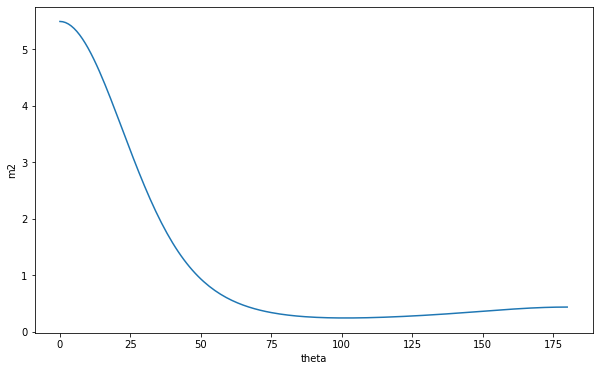

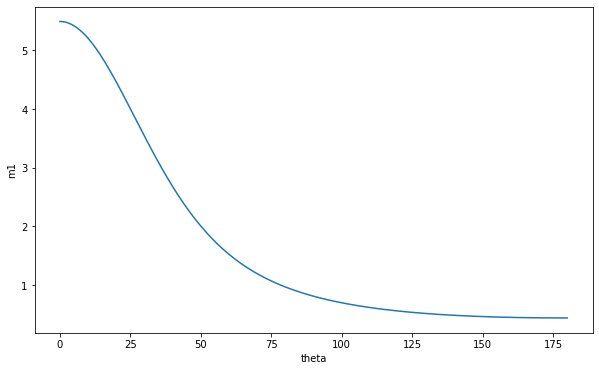

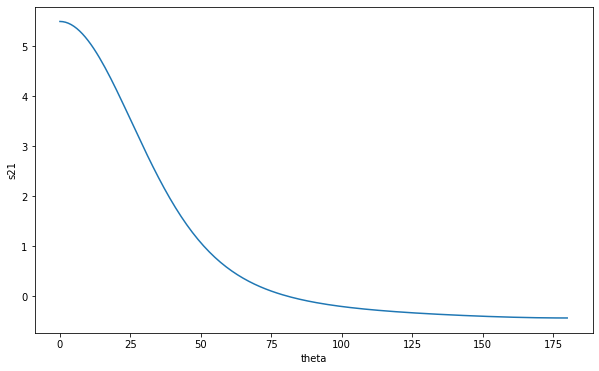

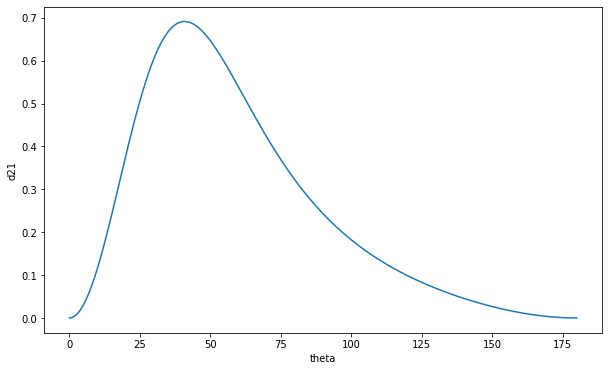

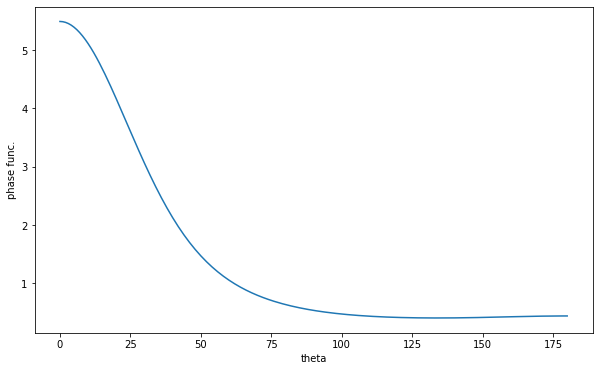

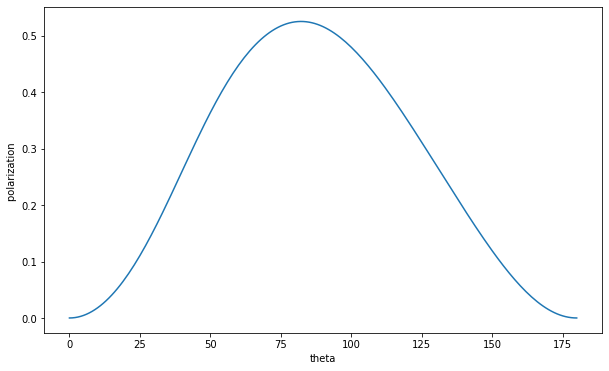

In [34]:
plotting(ascii_txt_reader("compLamCredzubko.txt",3))

# Question 7c

 numangles= 181
   g= 4.37525D-01
    scat. angle           m2               m1              s21              d21           phase func.      polarization  



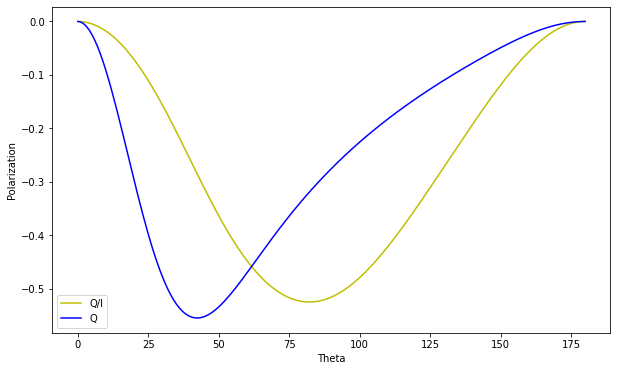

In [35]:
pol_phase_fxns("compLamCredzubko.txt")

# Question 7e

 numangles= 181
   g= 4.37525D-01
    scat. angle           m2               m1              s21              d21           phase func.      polarization  



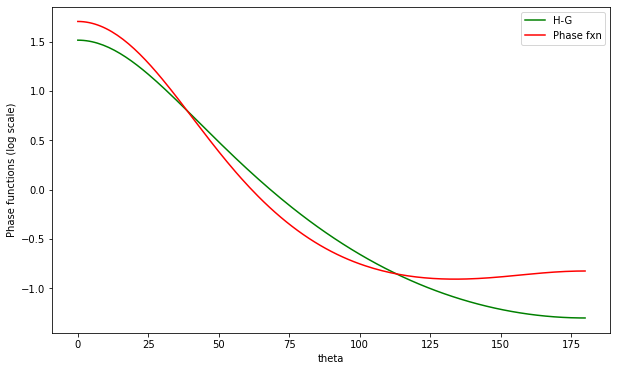

In [36]:
comparing_phase_HG("compLamCredzubko.txt", 0.437525)

In [37]:
evaluating_g("compLamCredzubko.txt", 0.437525)

 numangles= 181
   g= 4.37525D-01
    scat. angle           m2               m1              s21              d21           phase func.      polarization  

According to the file, the actual g =  0.437525
g numerically integrated over 181 angles evaluates to:


0.4485224476432988

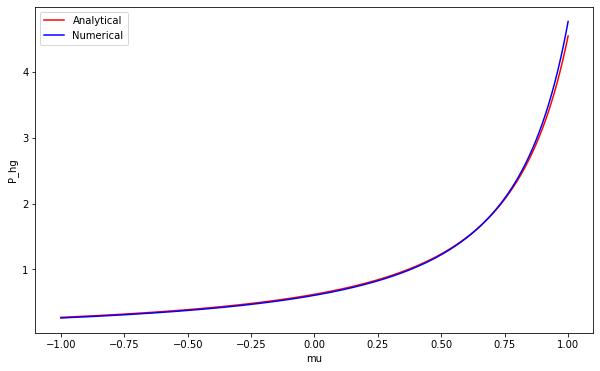

In [38]:
HGs(0.437525, 0.448522)

# Question 9a

In [39]:
def weighted_fxn(w1, w2, f1, f2):
    """Computes the weighted combined function given two of the same kind of function
    for two different compositions."""
    weighted = (w1*f1 + w2*f2)/(w1+w2)
    return(weighted)

In [40]:
#to find the weighted g:
weighted_fxn(133.197, 43.7558, 0.580738, 0.437525)

0.5453251702205334

 numangles= 181
   g= 5.80738D-01
    scat. angle           m2               m1              s21              d21           phase func.      polarization  

 numangles= 181
   g= 4.37525D-01
    scat. angle           m2               m1              s21              d21           phase func.      polarization  



Text(0, 0.5, 'phase function (log)')

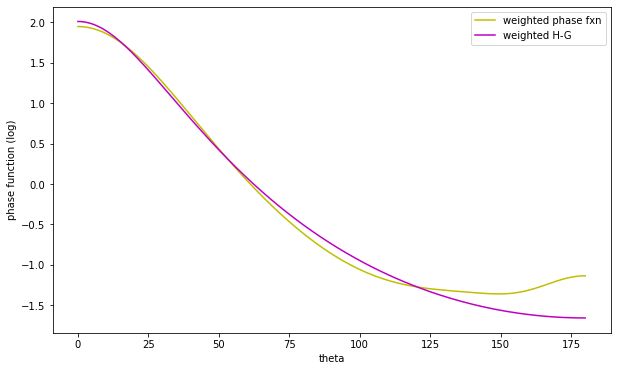

In [42]:
#plotting weighted phase fxn vs. theta
sil_cols = ascii_txt_reader("compaSilreddraine.txt",3)
car_cols = ascii_txt_reader('compLamCredzubko.txt',3)

#Plotting I
weighted_I = weighted_fxn(133.197, 43.7558, sil_cols[5,:], car_cols[5,:])
plt.plot(sil_cols[0,:], np.log(weighted_I), 'y')

#Overplotting weighted H-G fxn
g = weighted_fxn(133.197, 43.7558, 0.580738, 0.437525)
theta = np.linspace(0,180.,181)
P_hg = (1.-(g**2))*((1. + (g**2) - (2. * g * np.cos(theta*np.pi/180)))**(-3/2))
plt.plot(theta, np.log(P_hg), 'm')

#labels
plt.legend(['weighted phase fxn', 'weighted H-G'], loc = 'best')
plt.xlabel('theta')
plt.ylabel('phase function (log)')

# Question 9b: Weighted Q

In [45]:
#m2
print(sil_cols[1])

[7.5221  7.515   7.494   7.4592  7.4108  7.3491  7.2748  7.1882  7.09
 6.981   6.8618  6.7333  6.5963  6.4517  6.3005  6.1434  5.9814  5.8154
 5.6464  5.475   5.3022  5.1286  4.9551  4.7823  4.6109  4.4413  4.2741
 4.1098  3.9488  3.7913  3.6378  3.4883  3.3432  3.2026  3.0666  2.9352
 2.8084  2.6864  2.5691  2.4563  2.3482  2.2445  2.1451  2.0501  1.9591
 1.8722  1.7892  1.71    1.6343  1.5621  1.4933  1.4277  1.3651  1.3055
 1.2487  1.1946  1.143   1.0939  1.0471  1.0025  0.96013 0.91973 0.88128
 0.84466 0.80981 0.77663 0.74506 0.71501 0.68641 0.6592  0.63332 0.6087
 0.58529 0.56303 0.54187 0.52176 0.50265 0.4845  0.46727 0.45092 0.4354
 0.42069 0.40675 0.39354 0.38104 0.36921 0.35802 0.34746 0.33749 0.3281
 0.31925 0.31093 0.30311 0.29578 0.28891 0.2825  0.27652 0.27095 0.26579
 0.26102 0.25661 0.25257 0.24887 0.24551 0.24247 0.23974 0.23732 0.23518
 0.23332 0.23173 0.2304  0.22933 0.22849 0.22788 0.22749 0.22731 0.22732
 0.22753 0.22791 0.22846 0.22916 0.23    0.23097 0.23205 0.233

In [50]:
#m1
print(sil_cols[2])

[7.5221  7.5152  7.4946  7.4605  7.4132  7.3529  7.2801  7.1954  7.0994
 6.9927  6.8761  6.7503  6.6163  6.4748  6.3267  6.173   6.0145  5.8521
 5.6866  5.519   5.3499  5.1801  5.0104  4.8415  4.6738  4.5081  4.3447
 4.1842  4.027   3.8733  3.7234  3.5777  3.4362  3.2992  3.1667  3.0388
 2.9155  2.7969  2.6828  2.5733  2.4683  2.3676  2.2713  2.1791  2.091
 2.0068  1.9264  1.8496  1.7763  1.7064  1.6397  1.5761  1.5155  1.4576
 1.4025  1.3499  1.2997  1.2519  1.2062  1.1627  1.1212  1.0815  1.0437
 1.0075  0.973   0.94002 0.90852 0.87841 0.84963 0.8221  0.79577 0.77058
 0.74647 0.72339 0.70129 0.68012 0.65983 0.6404  0.62176 0.6039  0.58676
 0.57032 0.55455 0.5394  0.52487 0.51091 0.4975  0.48462 0.47224 0.46034
 0.44889 0.43789 0.42731 0.41712 0.40732 0.39788 0.3888  0.38005 0.37162
 0.3635  0.35567 0.34812 0.34083 0.33381 0.32703 0.32048 0.31416 0.30805
 0.30214 0.29643 0.2909  0.28555 0.28036 0.27533 0.27045 0.26572 0.26111
 0.25663 0.25227 0.24802 0.24387 0.23981 0.23584 0.23195 0.

In [51]:
print(sil_cols[6])

[ 0.0000e+00  1.0143e-05  4.0599e-05  9.1444e-05  1.6281e-04  2.5488e-04
  3.6790e-04  5.0219e-04  6.5812e-04  8.3614e-04  1.0368e-03  1.2607e-03
  1.5086e-03  1.7813e-03  2.0798e-03  2.4050e-03  2.7583e-03  3.1409e-03
  3.5542e-03  4.0000e-03  4.4798e-03  4.9957e-03  5.5496e-03  6.1438e-03
  6.7804e-03  7.4620e-03  8.1911e-03  8.9703e-03  9.8025e-03  1.0690e-02
  1.1637e-02  1.2644e-02  1.3716e-02  1.4856e-02  1.6065e-02  1.7347e-02
  1.8705e-02  2.0140e-02  2.1656e-02  2.3255e-02  2.4939e-02  2.6709e-02
  2.8567e-02  3.0516e-02  3.2555e-02  3.4687e-02  3.6911e-02  3.9228e-02
  4.1638e-02  4.4141e-02  4.6737e-02  4.9423e-02  5.2200e-02  5.5064e-02
  5.8016e-02  6.1051e-02  6.4167e-02  6.7361e-02  7.0629e-02  7.3967e-02
  7.7371e-02  8.0835e-02  8.4354e-02  8.7922e-02  9.1533e-02  9.5179e-02
  9.8854e-02  1.0255e-01  1.0626e-01  1.0997e-01  1.1367e-01  1.1736e-01
  1.2103e-01  1.2466e-01  1.2824e-01  1.3176e-01  1.3521e-01  1.3858e-01
  1.4186e-01  1.4503e-01  1.4807e-01  1.5099e-01  1

 numangles= 181
   g= 5.80738D-01
    scat. angle           m2               m1              s21              d21           phase func.      polarization  

 numangles= 181
   g= 4.37525D-01
    scat. angle           m2               m1              s21              d21           phase func.      polarization  



Text(0, 0.5, 'weighted polarization phase fxn')

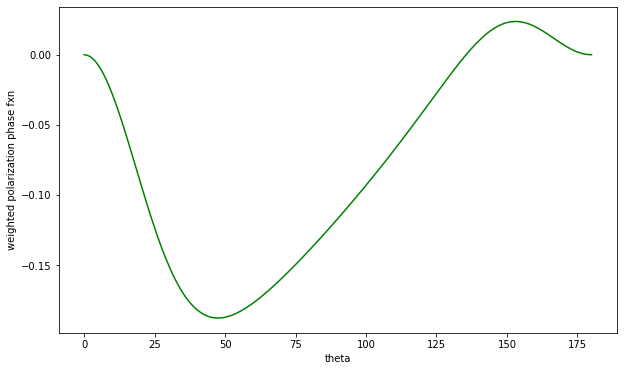

In [52]:
sil_cols = ascii_txt_reader("compaSilreddraine.txt",3)
car_cols = ascii_txt_reader('compLamCredzubko.txt',3)
Q_phase_fxn_sil = (sil_cols[1] - sil_cols[2]) * 0.5
Q_phase_fxn_car = (car_cols[1] - car_cols[2]) * 0.5
f1 = Q_phase_fxn_sil
f2 = Q_phase_fxn_car

#using theta column from silicate file (same in both files)
plt.plot(sil_cols[0,:], weighted_fxn(133.197, 43.7558, f1, f2)[:], 'g')
#plt.plot(sil_cols[0,:], Q_phase_fxn_sil[:], 'r')
#plt.plot(sil_cols[0,:], Q_phase_fxn_car[:], 'y')
plt.xlabel('theta')
plt.ylabel('weighted polarization phase fxn')
#no, a log plot can only be used if the negative values are adjusted.

# Question 9c/d

#### Plot the phase function and polarization phase function on the same plot. Use a logarithmic form.

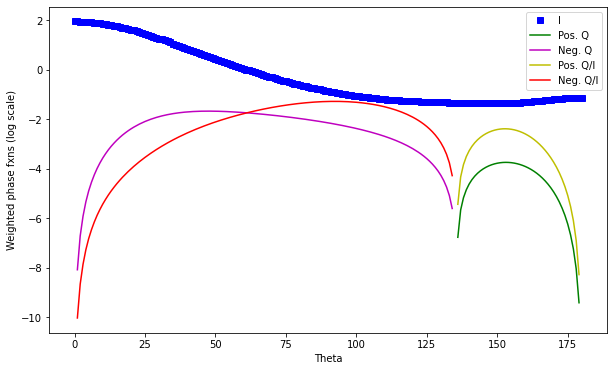

In [46]:
#I phase fxn
plt.plot(sil_cols[0,:], np.log(weighted_I), 'bs')

#Q pol phase fxn
Q_sil = (sil_cols[1] - sil_cols[2]) * 0.5
Q_car = (car_cols[1] - car_cols[2]) * 0.5
Q = (weighted_fxn(133.197, 43.7558, Q_sil, Q_car))
log_plotting(Q, 0, -1, 'g', 'm') 

#Q/I phase fxn
Q_I = Q/weighted_I
log_plotting(Q_I, 0, -1, 'y', 'r') 


#labels
plt.xlabel('Theta')
plt.ylabel('Weighted phase fxns (log scale)')
plt.legend(['I', 'Pos. Q', 'Neg. Q', 'Pos. Q/I', 'Neg. Q/I'], loc = 'best')

In [44]:
def spider_scat_angle(a, c, beta):  
    #a = observer to scatterer distance (earth - spider)
    #c = 8.5e3 #observer to rad source distance (earth - gal. centre)
    #beta = angle between rad source and scatterer (spider - gal centre)
    beta_converted = beta * np.pi/180
    b_2 = a**2 + c**2 - 2*a*c*np.cos(beta_converted)
    b = b_2**0.5
    gamma = (180 /np.pi)* np.arccos((a**2 + b_2 - c**2)/(2*a*b))
    print(gamma)
    scat_angle = 180-gamma
    print(scat_angle)

In [45]:
spider_scat_angle(a = 200, c = 8.5e3, beta = 135)

44.06240845900283
135.93759154099718


In [46]:
print(math.atan2(-np.pi,-np.pi))

-2.356194490192345


In [47]:
def scat_angle(l1,b1,l2,b2):
    """Takes the coordinates of incoming and outgoing light vectors and returns
    the angle between them."""
    #degree conversions
    phi1 = l1 * np.pi/180.
    phi2 = l2 * np.pi/180.
    theta1 = np.pi/2 - (b1 * np.pi/180.) 
    theta2 = np.pi/2 - (b2 * np.pi/180.)
    #coordinate conversions
    x1 = np.sin(theta1) * np.cos(phi1)
    x2 = np.sin(theta2) * np.cos(phi2)
    y1 = np.sin(theta1) * np.sin(phi1)
    y2 = np.sin(theta2) * np.sin(phi2)
    z1 = np.cos(theta1)
    z2 = np.cos(theta2)
    #interior angle
    int_angle = np.arccos((x1*x2 + y1*y2 + z1*z2)/  \
                      (((x1**2 + y1**2 + z1**2)**0.5) * \
                       ((x2**2 + y2**2 + z2**2)**0.5)))
    #scattering angle
    ext_angle = (np.pi - int_angle) * 180/np.pi
    return ext_angle

In [48]:
scat_angle(135,40,0,0)


57.20224866894283

In [49]:
scat_angle(0,90,0,45)

135.0

In [50]:
def ortho_to_scat_plane(l1,b1,l2,b2):
    """Takes the coordinates of incoming and outgoing light vectors and returns
    a vector orthogonal to their scattering plane."""
    #degree conversions
    phi1 = l1 * np.pi/180. 
    phi2 = l2 * np.pi/180. 
    theta1 = np.pi/2 - (b1 * np.pi/180.)
    theta2 = np.pi/2 - (b2 * np.pi/180.)
    #coordinate conversions
    x1 = np.sin(theta1) * np.cos(phi1)
    x2 = np.sin(theta2) * np.cos(phi2)
    y1 = np.sin(theta1) * np.sin(phi1)
    y2 = np.sin(theta2) * np.sin(phi2)
    z1 = np.cos(theta1)
    z2 = np.cos(theta2)
    #computing vector orthogonal to scattering plane
    ortho_theta = -(x1*z2 - x2*z1) * 180/np.pi
    ortho_phi = (x1*y2 - y1*x2)  * 180/np.pi
    if abs(ortho_theta) < 1e-10:
        ortho_theta = 0
    if abs(ortho_phi) < 1e-10:
        ortho_phi = 0
    return ortho_theta, ortho_phi

In [51]:
ortho_to_scat_plane(90,0,0,90)

(0, 0)

In [52]:
#THIS FXN DOES NOT WORK
def meridian_normal_angle(l1,b1,l2,b2):
    """Takes the coordinates of incoming and outgoing light vectors, finds the normal vector of the \
    scattering plane, and returns the angle between the normal vector and the meridian plane."""
    #defining normal vector's coordinates
    theta_n = ortho_to_scat_plane(l1,b1,l2,b2)[0] * np.pi/180 #0 corresponding to theta
    phi_n = ortho_to_scat_plane(l1,b1,l2,b2)[1] * np.pi/180 #1 corresponding to phi
    
    #theta_m = b1 * np.pi/180. 
    #how do we define latitude (theta) for meridian plane? covering all values
    #theta_m = 90 * np.pi/180
    #phi_m = l1 * np.pi/180. #still using l1
    
    #need to use normal of meridian plane?
    #make plane by defining two vectors, same longitude, latitu separated by 90
    theta_m = (ortho_to_scat_plane(l2,b2,l2,b2+90)[0]) *np.pi/180 
    phi_m = (ortho_to_scat_plane(l2,b2,l2,b2+90)[1]) *np.pi/180
    #CHECK IF B1 OR B2
    
    
    #coordinate conversions
    x1 = np.sin(theta_n) * np.cos(phi_n)
    x2 = np.sin(theta_m) * np.cos(phi_m)
    y1 = np.sin(theta_n) * np.sin(phi_n)
    y2 = np.sin(theta_m) * np.sin(phi_m)
    z1 = np.cos(theta_n)
    z2 = np.cos(theta_m)
    
    #interior angle
    int_angle = np.arcsin((x1*x2 + y1*y2 + z1*z2)/  \
                      (((x1**2 + y1**2 + z1**2)**0.5) * \
                       ((x2**2 + y2**2 + z2**2)**0.5)))
    #true_angle = 90 - int_angle*180/np.pi
    return int_angle * 180./np.pi

In [53]:
meridian_normal_angle(90, 0, 0,0)

32.704220486917684

In [54]:
meridian_normal_angle(0,0,180,0)

32.704220486917684

In [55]:
#57.29 deg = 1 radian